In [1]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [5]:
k = 5.
l = 3.
m = 2.
g = 9.8
r0 = 15.
tetha0 = np.pi/8
v0 = 0.
w0 = 0.

In [4]:
#discretización
h = 0.015
N = 2001
t = np.linspace(0, 30, 2001)

In [7]:
#aceleración lineal
def aR(r,v, tetha, w):
    return k*(l-r)/m + g*np.cos(tetha) + r*w**2

In [6]:
#aceleracion angular
def aA(r,v, tetha, w):
    return -g*np.sin(tetha)/l - 2*v*w/r

In [35]:
def Beeman(R0, t, h):
    
    r = np.zeros(len(t))
    v = np.zeros(len(t))
    tetha = np.zeros(len(t))
    w = np.zeros(len(t))
    
    r[0] = R0[0]
    v[0] = R0[1]
    tetha[0] = R0[2]
    w[0] = R0[3]  
    
    #Euler /pasado
    #para velocidad
    ar0 = aR(R0[0], R0[1], R0[2], R0[3])
    vp = R0[1] + ar0*h
    #para velocidad angular
    aA0 = aA(R0[0], R0[1], R0[2], R0[3])
    wp = R0[3] + aA0*h
    
    #Para r
    rp = R0[0] + vp*h
    #para tetha
    tethap = R0[2] + wp*h
    
    r[1] = rp
    v[1] = vp
    tetha[1] = tethap
    w[1] = wp 
    print(r[1], v[1], tetha[1], w[1])
    for i in tqdm(range(2, len(t))):
        r[i] = r[i-1] + h*v[i-1] + (4*aR(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2], v[i-2], tetha[i-2], w[i-2]))*(h**2)/6
        tetha[i] = tetha[i-1] + h*v[i-1] + (4*aA(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2], v[i-2], tetha[i-2], w[i-2]))*(h**2)/6
        v[i] = v[i-1] + (3*aR(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2], v[i-2], tetha[i-2], w[i-2]))*h/2
        w[i] = w[i-1] + (3*aA(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2], v[i-2], tetha[i-2], w[i-2]))*h/2
        
    return r, v, tetha, w

In [36]:
R0 = [r0, v0, tetha0, w0]

In [44]:
r, v, tetha, w = Beeman(R0, t, h)

14.995287154369187 -0.31418970872084084 0.3924178093759358 -0.018751488185889398


  0%|                                                                                         | 0/1999 [00:00<?, ?it/s]<ipython-input-7-92eba5067b66>:3: RuntimeWarning: overflow encountered in double_scalars
  return k*(l-r)/m + g*np.cos(tetha) + r*w**2
<ipython-input-7-92eba5067b66>:3: RuntimeWarning: invalid value encountered in cos
  return k*(l-r)/m + g*np.cos(tetha) + r*w**2
<ipython-input-35-317590770680>:33: RuntimeWarning: invalid value encountered in double_scalars
  tetha[i] = tetha[i-1] + h*v[i-1] + (4*aA(r[i-1], v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2], v[i-2], tetha[i-2], w[i-2]))*(h**2)/6
<ipython-input-6-55c926ea165d>:3: RuntimeWarning: invalid value encountered in sin
  return -g*np.sin(tetha)/l - 2*v*w/r
<ipython-input-6-55c926ea165d>:3: RuntimeWarning: invalid value encountered in double_scalars
  return -g*np.sin(tetha)/l - 2*v*w/r
100%|████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:00<00:00, 6915.38it/s]

[15.         14.99528715 14.9882206  ...         nan         nan
         nan]


In [47]:
for i in range(len(r)):
    print(r[i], tetha[i])

15.0 0.39269908169872414
14.995287154369187 0.3924178093759358
14.988220602307221 0.3875643370558735
14.976454370719763 0.3780059747263554
14.9600083719568 0.36375954100085905
14.938911275826792 0.34485115840649144
14.913199270548693 0.321314917596439
14.88291506940961 0.2931920064088988
14.84810669245395 0.26052960554969923
14.80882603814666 0.22337956316670302
14.765127265115158 0.18179686542464837
14.717065009779 0.13583792561915456
14.664692471960581 0.08555872046259701
14.608059407217572 0.031012808751890227
14.547210071357222 -0.02775072557128399
14.48218116903085 -0.09068935726371925
14.412999864069569 -0.15776917561845646
14.339681913897149 -0.22896685208198242
14.262229993539073 -0.30427145544032946
14.18063227606639 -0.38368604806640444
14.094861335451542 -0.46722899646081284
14.004873434523612 -0.5549349313656361
13.910608254828581 -0.6468552972718359
13.811989116654832 -0.743058438269157
13.708923726307471 -0.8436291768929952
13.601305474059913 -0.9486678547822641
13.489015

In [39]:
#corrector
vc = np.zeros(len(t))
wc = np.zeros(len(t))
for i in range(2, len(t)+2):
    vc[i] = v[i-1] + (5*aR(r[i],v[i], tetha[i], w[i]) + 8*aR(r[i-1],v[i-1], tetha[i-1], w[i-1]) - aR(r[i-2],v[i-2], tetha[i-2], w[i-2]))/12
    wc[i] = w[i-1] + (5*aA(r[i],v[i], tetha[i], w[i]) + 8*aR(r[i-1],v[i-1], tetha[i-1], w[i-1]) - aA(r[i-2],v[i-2], tetha[i-2], w[i-2]))/12

<ipython-input-7-92eba5067b66>:3: RuntimeWarning: overflow encountered in double_scalars
  return k*(l-r)/m + g*np.cos(tetha) + r*w**2
<ipython-input-7-92eba5067b66>:3: RuntimeWarning: invalid value encountered in cos
  return k*(l-r)/m + g*np.cos(tetha) + r*w**2
<ipython-input-6-55c926ea165d>:3: RuntimeWarning: invalid value encountered in sin
  return -g*np.sin(tetha)/l - 2*v*w/r
<ipython-input-6-55c926ea165d>:3: RuntimeWarning: invalid value encountered in double_scalars
  return -g*np.sin(tetha)/l - 2*v*w/r


IndexError: index 2001 is out of bounds for axis 0 with size 2001

<IPython.core.display.Javascript object>


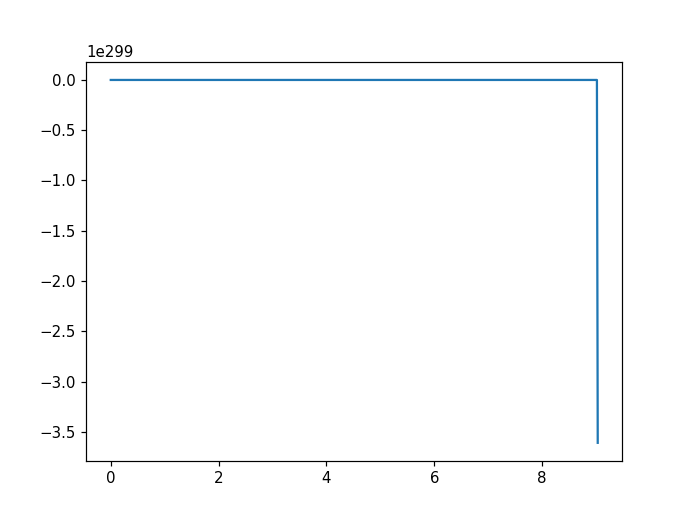

[15.         14.99528715 14.9882206  ...         nan         nan
         nan]


In [43]:
plt.plot(t, r)
print(r)